In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline

In [5]:
data = pd.read_csv('/content/oil_spill.csv')


In [6]:
data.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [7]:
X = data.drop('target', axis = 1)
y = data['target']

In [9]:
from sklearn.model_selection import train_test_split

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
pipeline = IMBPipeline(steps=[
    ('oversample', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))  # Classifier
])

In [12]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
y_pred_prob = cross_val_predict(pipeline, X, y, cv=cv, method='predict_proba', n_jobs=-1)[:, 1]
pr_auc = average_precision_score(y, y_pred_prob)
print(f'Precision-Recall AUC: {pr_auc:.4f}')

Precision-Recall AUC: 0.5715


<Axes: >

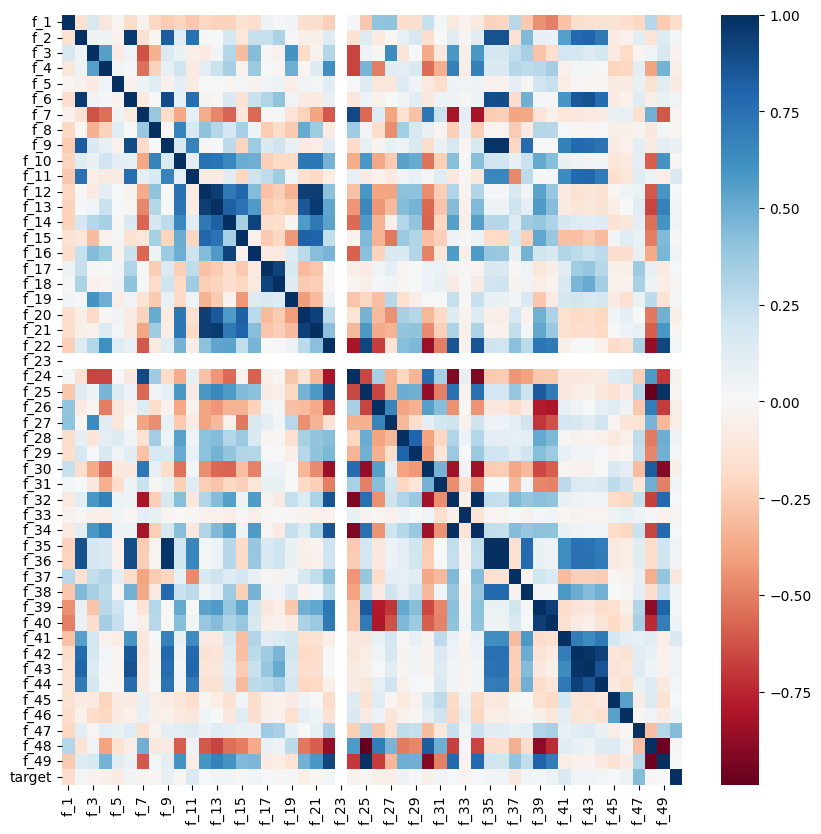

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
corr=data.corr()
plt.figure(figsize=[10,10])
sns.heatmap(corr,cmap='RdBu')

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# Split the training data into training and validation sets
X_train_full, X_val, y_train_full, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Initialize dictionaries to store the accuracies
results = {
    "Model": [],
    "Train Accuracy": [],
    "Validation Accuracy": [],
    "Test Accuracy": []
}

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_full, y_train_full)

y_pred_xgb_train = xgb_model.predict(X_train_full)
y_pred_xgb_val = xgb_model.predict(X_val)
y_pred_xgb_test = xgb_model.predict(X_test)

train_acc_xgb = accuracy_score(y_train_full, y_pred_xgb_train)
val_acc_xgb = accuracy_score(y_val, y_pred_xgb_val)
test_acc_xgb = accuracy_score(y_test, y_pred_xgb_test)

results["Model"].append("XGBoost")
results["Train Accuracy"].append(train_acc_xgb)
results["Validation Accuracy"].append(val_acc_xgb)
results["Test Accuracy"].append(test_acc_xgb)

# LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_full, y_train_full)

y_pred_lgb_train = lgb_model.predict(X_train_full)
y_pred_lgb_val = lgb_model.predict(X_val)
y_pred_lgb_test = lgb_model.predict(X_test)

train_acc_lgb = accuracy_score(y_train_full, y_pred_lgb_train)
val_acc_lgb = accuracy_score(y_val, y_pred_lgb_val)
test_acc_lgb = accuracy_score(y_test, y_pred_lgb_test)

results["Model"].append("LightGBM")
results["Train Accuracy"].append(train_acc_lgb)
results["Validation Accuracy"].append(val_acc_lgb)
results["Test Accuracy"].append(test_acc_lgb)

# CatBoost
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train_full, y_train_full)

y_pred_cat_train = cat_model.predict(X_train_full)
y_pred_cat_val = cat_model.predict(X_val)
y_pred_cat_test = cat_model.predict(X_test)

train_acc_cat = accuracy_score(y_train_full, y_pred_cat_train)
val_acc_cat = accuracy_score(y_val, y_pred_cat_val)
test_acc_cat = accuracy_score(y_test, y_pred_cat_test)

results["Model"].append("CatBoost")
results["Train Accuracy"].append(train_acc_cat)
results["Validation Accuracy"].append(val_acc_cat)
results["Test Accuracy"].append(test_acc_cat)

# Create a DataFrame to display the results
df_results = pd.DataFrame(results)

# Print the results
print(df_results)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:43:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 26, number of negative: 573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5114
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.043406 -> initscore=-3.092789
[LightGBM] [Info] Start training from score -3.092789
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [29]:
df_results

,Model,Train Accuracy,Validation Accuracy,Test Accuracy
0,XGBoost,1.0,0.946667,0.952128
1,LightGBM,1.0,0.966667,0.957447
2,CatBoost,1.0,0.973333,0.962766


In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from datetime import datetime

# Timer function to track time
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    else:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print(f"\n Time Taken: {int(thour)} hours {int(tmin)} minutes {round(tsec, 2)} seconds.")



# Define parameter grids for each model
xgb_params = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.3, 0.5, 0.7]
}

lgb_params = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'num_leaves': [20, 31, 40, 50],
}

catboost_params = {
    'depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'iterations': [100, 200, 300]
}

# RandomizedSearchCV for XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_random = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter=5, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)

start_time = timer()
xgb_random.fit(X_train, y_train)
timer(start_time)

# RandomizedSearchCV for LightGBM
lgbm = lgb.LGBMClassifier()
lgb_random = RandomizedSearchCV(lgbm, param_distributions=lgb_params, n_iter=5, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)

start_time = timer()
lgb_random.fit(X_train, y_train)
timer(start_time)

# RandomizedSearchCV for CatBoost
cat = CatBoostClassifier(verbose=0)
cat_random = RandomizedSearchCV(cat, param_distributions=catboost_params, n_iter=5, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)

start_time = timer()
cat_random.fit(X_train, y_train)
timer(start_time)

# Get the best parameters and best models
print("Best XGBoost Parameters:", xgb_random.best_params_)
print("Best LightGBM Parameters:", lgb_random.best_params_)
print("Best CatBoost Parameters:", cat_random.best_params_)

# Evaluate each model on the test set
xgb_best = xgb_random.best_estimator_
lgb_best = lgb_random.best_estimator_
cat_best = cat_random.best_estimator_

# Make predictions
xgb_pred = xgb_best.predict(X_test)
lgb_pred = lgb_best.predict(X_test)
cat_pred = cat_best.predict(X_test)

# Calculate accuracy
xgb_acc = accuracy_score(y_test, xgb_pred)
lgb_acc = accuracy_score(y_test, lgb_pred)
cat_acc = accuracy_score(y_test, cat_pred)

# Print accuracies
print(f"XGBoost Test Accuracy: {xgb_acc:.4f}")
print(f"LightGBM Test Accuracy: {lgb_acc:.4f}")
print(f"CatBoost Test Accuracy: {cat_acc:.4f}")

# Display results in a table
results = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM', 'CatBoost'],
    'Best Parameters': [xgb_random.best_params_, lgb_random.best_params_, cat_random.best_params_],
    'Test Accuracy': [xgb_acc, lgb_acc, cat_acc]
})

print("\nResults:")
print(results)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:54:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Time Taken: 0 hours 0 minutes 5.52 seconds.
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Info] Number of positive: 33, number of negative: 716
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6319
[LightGBM] [Info] Number of data points in the train set: 749, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.044059 -> initscore=-3.077173
[LightGBM] [Info] Start training from score -3.077173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [32]:
results


,Model,Train Accuracy,Validation Accuracy,Test Accuracy
0,XGBoost,1.0,0.946667,0.952128
1,LightGBM,1.0,0.966667,0.957447
2,CatBoost,1.0,0.973333,0.962766


In [33]:
df_results

,Model,Train Accuracy,Validation Accuracy,Test Accuracy
0,XGBoost,1.0,0.946667,0.952128
1,LightGBM,1.0,0.966667,0.957447
2,CatBoost,1.0,0.973333,0.962766
